# Visualisation of Electric Potential and Electric Field 
## 21018444
This assignment provides a visualisation of the electric potential and the electric field of charges. After exploring a single charge, the visualisation of a dipole (two opposite charges) and a quadruple (four charges with two positive and two negative) has been completed. The relevant formulae used in this assignment are
$$
\begin{align*}
    V &= \frac{q}{r}  & (\mathrm{1})\\
    E &= \frac{q}{r^2} & (\mathrm{2})
\end{align*}
$$
where $V$ corresponds to the electric potential, $E$ to the electric field, $q$ to the charge of the particle, and $r$ to the distance between the particle and a given position. It should be recognised that both equations are using natural units for the sake of simplicity.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Equation $(\mathrm{1})$ was used below to calculate the potential from a point charge at a given point in a 2D Cartesian space. When calculating the distance between two points, the formula

$$ 
\begin{align*}
r &= \sqrt{(x_0 - x)^2 + (y_0 - y)^2} \qquad (\mathrm{3})
\end{align*}
$$

was used, where $x_0$ and $y_0$ denote the $x$ and $y$ positions of the point charge, and $x$ and $y$ the given positions on the meshgrid.

In [196]:
def potential(charge,x0,y0,x,y):
    """
    Calculates the electric potential at a given point
    due to a point charge
    
    Inputs:
    charge  Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated

    Outputs:
    pot     Electric potential of the point charge
    """
    # Calculating distance with (3)
    r = np.sqrt((x0-x)**2 + (y0-y)**2)

    # Calculating potential with (1)
    pot = charge / r
    
    return pot

### Visualising Electric Potential
With the function $\verb|potential|$ detailed above, four point charges were created and assigned positions/charges. The following visualisations of electric potential include a point charge, a dipole, and a quadrupole. It is worth noting that in calculating the potential for dipoles and quadrupoles, the potentials were added as vector sums:

$$
\begin{align*}

V_d &= V_1 + V_2 & (\mathrm{4})\\
V_q &= V_1 + V_2 + V_3 + V_4 & (\mathrm{5})

\end{align*}
$$

with each $V_n : n \in [1,4]$ being the different charges created.

/var/folders/nt/c8q6jtvd3bqf7xglvycgf6680000gn/T/ipykernel_45852/1197253310.py:18: RuntimeWarning: divide by zero encountered in divide
  pot = charge / r


Text(0, 0.5, 'y')

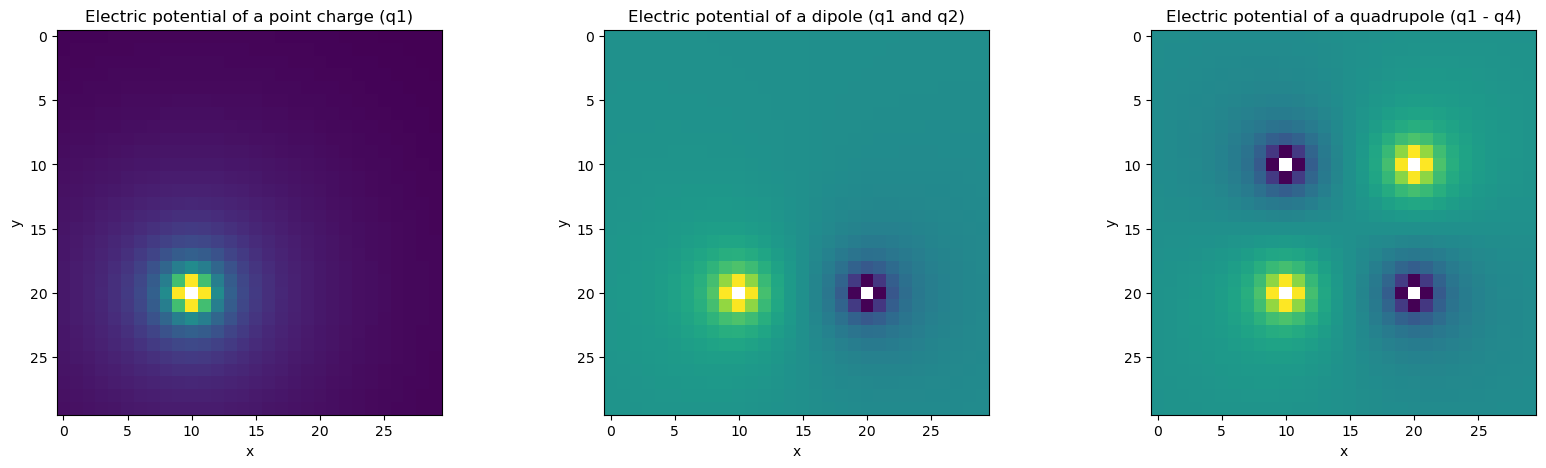

In [195]:
# Defining variables for charge(s) and positions
q1 = 1
x1 = 10
y1 = 20

q2 = -1
x2 = 20
y2 = 20

q3 = 1
x3 = 20
y3 = 10

q4 = -1
x4 = 10
y4 = 10

# Create grid of x and y positions for plotting
x = np.arange(30)
y = np.arange(30)
x2D, y2D = np.meshgrid(x, y)

# Calculating and displaying the potential of the single charge
pot1 = potential(q1,x1,y1,x2D,y2D) 
fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(1, 3, 1)
ax1.imshow(pot1)
ax1.set_title("Electric potential of a point charge (q1)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")


# Calculating and displaying the potential of the dipole
pot2 = potential(q2, x2, y2, x2D, y2D)

# Adding the potentials as a vector sum with (4)
potd = pot1 + pot2

ax2 = fig1.add_subplot(1, 3, 2)
ax2.imshow(potd)
ax2.set_title("Electric potential of a dipole (q1 and q2)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")


# Calculating and displaying the potential of the quadrupole
pot3 = potential(q3, x3, y3, x2D, y2D)
pot4 = potential(q4, x4, y4, x2D, y2D)

# Adding the potentials as a vector sum with (5)
potq = pot1 + pot2 + pot3 + pot4

ax3 = fig1.add_subplot(1, 3, 3)
ax3.imshow(potq)
ax3.set_title("Electric potential of a quadrupole (q1 - q4)")
ax3.set_xlabel("x")
ax3.set_ylabel("y")


### Visualising Electric Field
A similar approach was taken with displaying the electric field, with a function $\verb|field|$ defined below which uses equation $(\mathrm{2})$ to calculate this. Changes were required to be made to $(\mathrm{2})$, specifically: 
$$
\begin{align*}
\vec{E_x} = \frac{q(x_0-x)}{r^3} & \quad(\mathrm{6})\\
\vec{E_y} = \frac{q(y_0-y)}{r^3} & \quad(\mathrm{7})
\end{align*}
$$
which facilitated each component in providing a direction and a magnitude since this was equivalent to multiplying by $\frac{r}{|r|}$. As was the case with the last visualisation, the potentials were also added as a vector sum to display the dipole and quadrupole. Given the aymtopic behavior of the function as $r \to 0$, points near the centre of the charge were neglected. Not removing these led to large field lines emitted from the centre of the point charge.

In [197]:
def field(charge,x0,y0,x,y):
    """
    Calculates the x and y-components of the electric
    field of a point charge
    
    Inputs:
    charge  Value of charge
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated

    Outputs:
    Ex      x-component of electric field
    Ex      y-component of electric field
    """
    # Calculating the distance with (3)
    r = np.sqrt((x0-x)**2 + (y0-y)**2)

    # Calculating each component through (6) and (7)
    Ex = charge * (x0-x)/ r**3
    Ey = charge * (y0-y)/ r**3

    # Removing points near the centre of the charge
    mask = (r > 2)
    Ex = np.ma.array(Ex, mask = ~mask)
    Ey = np.ma.array(Ey, mask = ~mask)

    return Ex, Ey


/var/folders/nt/c8q6jtvd3bqf7xglvycgf6680000gn/T/ipykernel_45852/3174523061.py:19: RuntimeWarning: invalid value encountered in divide
  Ex = charge * (x0-x)/ r**3
/var/folders/nt/c8q6jtvd3bqf7xglvycgf6680000gn/T/ipykernel_45852/3174523061.py:20: RuntimeWarning: invalid value encountered in divide
  Ey = charge * (y0-y)/ r**3


Text(0, 0.5, 'y')

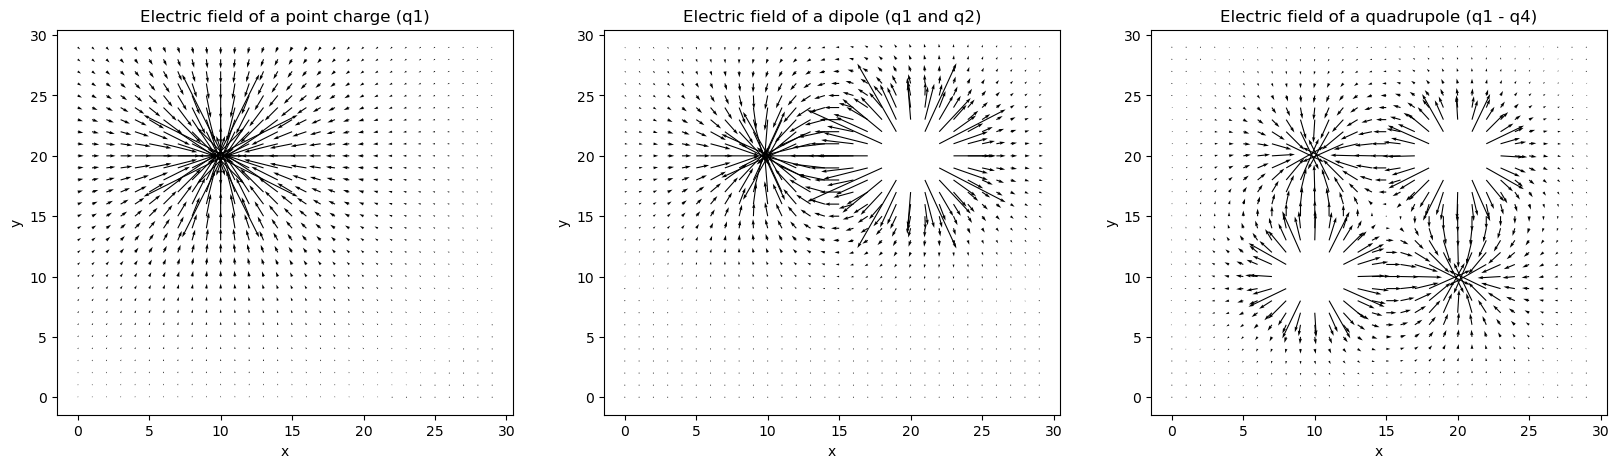

In [198]:
# Creating and plotting field for a single charge
Ex1, Ey1 = field(q1,x1,y1,x2D,y2D)

fig2 = plt.figure(figsize=(20, 5))
ax1 = fig2.add_subplot(1, 3, 1)
ax1.quiver(x2D, y2D, Ex1, Ey1)
ax1.set_title("Electric field of a point charge (q1)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")


# Creating and plotting field for a dipole
Ex2, Ey2 = field(q2,x2,y2,x2D,y2D)
dEx = Ex1 + Ex2 
dEy = Ey1 + Ey2

ax2 = fig2.add_subplot(1, 3, 2)
ax2.quiver(x2D, y2D, dEx, dEy)
ax2.set_title("Electric field of a dipole (q1 and q2)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")


# Create and plotting field for a quadrupole
Ex3, Ey3 = field(q3,x3,y3,x2D,y2D)
Ex4, Ey4 = field(q4,x4,y4,x2D,y2D)
qEx = Ex1 + Ex2 + Ex3 + Ex4
qEy = Ey1 + Ey2 + Ey3 + Ey4

ax3 = fig2.add_subplot(1,3,3)
ax3.quiver(x2D, y2D, qEx, qEy)
ax3.set_title("Electric field of a quadrupole (q1 - q4)")
ax3.set_xlabel("x")
ax3.set_ylabel("y")


### Conclusions
Through this exercise, insights have been gained in the neat illustration of complex physics phenomena. Furthermore, it was learned that in the case of visualising electric field, the formula was required to be adapted in order to display the field correctly. Without doing so, the field did not display circular symmetry and was instead tending to a line $y=x$. Furthermore, in the electric potential case, there were some problems in depicting the centre of the point charges, given the asymptopic behaviour of electric potential as $r \to 0$.